In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./olist_df.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     97916 non-null  int64  
 1   order_id                       97916 non-null  object 
 2   order_item_id                  97916 non-null  int64  
 3   product_id                     97916 non-null  object 
 4   seller_id                      97916 non-null  object 
 5   shipping_limit_date            97916 non-null  object 
 6   price                          97916 non-null  float64
 7   freight_value                  97916 non-null  float64
 8   payment_sequential             97916 non-null  int64  
 9   payment_type                   97916 non-null  object 
 10  payment_installments           97916 non-null  int64  
 11  payment_value                  97916 non-null  float64
 12  review_id                      97916 non-null 

In [13]:
new_df =df.groupby("customer_state")["payment_value"].sum()
new_df = new_df.sort_values(ascending=False).head(10)
df_state= new_df.index


In [14]:
# 그룹화를 하면 기준 -> 인덱스로 바뀐다 -> 시리즈 생성한다.
# as_index=False -> 그룹화 기준 컬럼을 인덱스로 사용하지 않고, 그대로 컬럼으로 사용한다,
# -> 그룹화 결과가 데이터프레임을 생성한다.

new_df = df.groupby(by=["customer_state"], as_index=False)["payment_value"].sum()
#new_df = new_df.sort_values(by="price" ,ascending=False)
# 'Position'이 'Data Scientist' 또는 'HR Specialist'인 행 필터링
# filtered_df = df[df['Position'].isin(['Data Scientist', 'HR Specialist'])]
filtered_df = new_df[new_df["customer_state"].isin(df_state)].reset_index()
filtered_df.drop(columns="index",inplace=True)
print(filtered_df)

  customer_state  payment_value
0             BA      591665.48
1             DF      344924.32
2             GO      338117.77
3             MG     1814013.13
4             PE      315396.74
5             PR      787249.30
6             RJ     2060255.14
7             RS      867328.76
8             SC      593552.67
9             SP     5790219.33


In [15]:
#customer_state ==SP and customer_state == RJ

In [16]:
print(df["customer_city"].nunique())

4108


<Axes: xlabel='customer_state', ylabel='payment_value'>

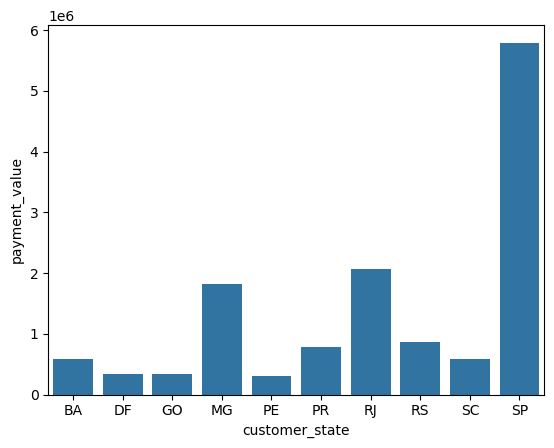

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(
    data=filtered_df,
    x="customer_state",
    y="payment_value",
    # hue="payment_type",
)